 # Anomaly Detection in Access Logs

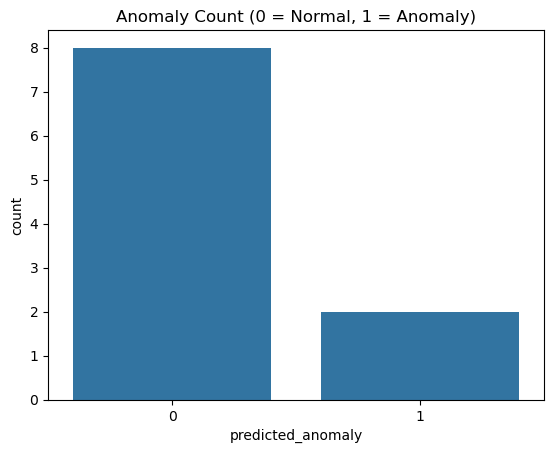

In [4]:

# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the Excel file
df = pd.read_excel("C:/access_log_anomaly_detected.xlsx")

# Timestamp conversion
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Encode categorical variables
le_action = LabelEncoder()
le_resource = LabelEncoder()
le_ip = LabelEncoder()

df['action_encoded'] = le_action.fit_transform(df['action'])
df['resource_encoded'] = le_resource.fit_transform(df['resource'])
df['ip_encoded'] = le_ip.fit_transform(df['ip_address'])

# Features and model
features = df[['hour', 'day_of_week', 'action_encoded', 'resource_encoded', 'ip_encoded', 'status_code']]
model = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
df['anomaly_score'] = model.fit_predict(features)
df['predicted_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Visualize anomaly count
sns.countplot(x='predicted_anomaly', data=df)
plt.title('Anomaly Count (0 = Normal, 1 = Anomaly)')
plt.show()

# Save results
df.to_excel("access_log_anomaly_detected.xlsx", index=False)